# Creating Networks

In [29]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [30]:
# Define the country relationships (example structure)
country_relationships = {
    'Country': ['USA', 'Canada', 'Mexico', 'France', 'Germany'],
    'Ally': ['UK', 'USA', 'USA', 'Germany', 'France'],
    'Trade_Partner': ['China', 'Mexico', 'Canada', 'Italy', 'Poland']
}

# Convert to DataFrame
df = pd.DataFrame(country_relationships)

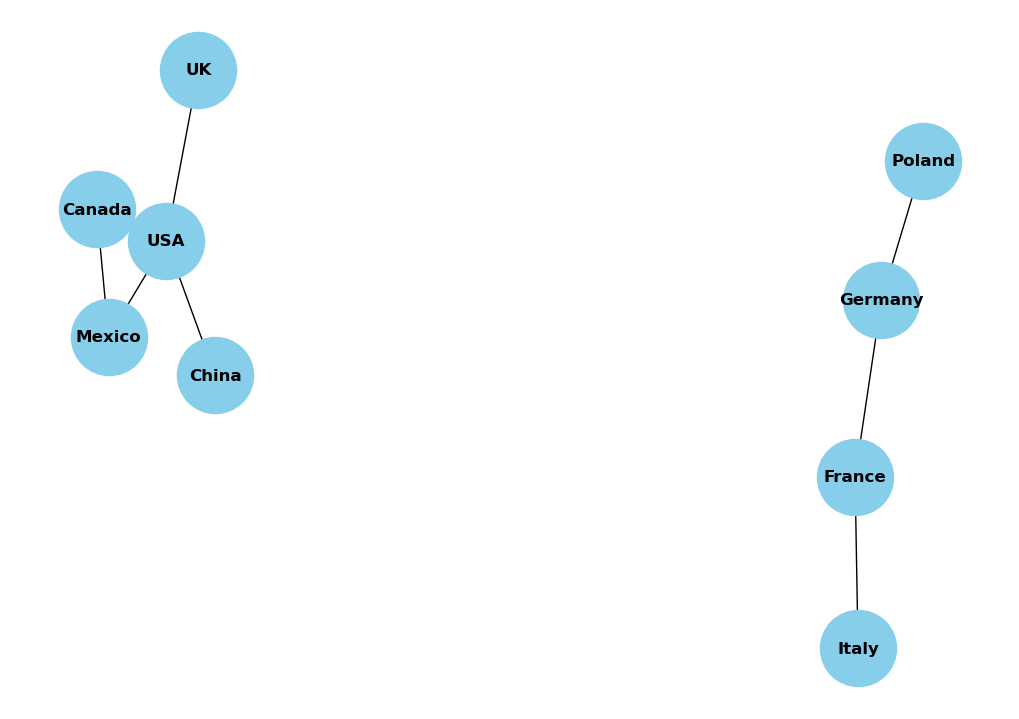

In [31]:
# Create a new Graph object
G = nx.Graph()

# Add edges to the graph for 'Ally' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Ally'], relationship='Ally')

# Add edges to the graph for 'Trade_Partner' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Trade_Partner'], relationship='Trade Partner')

# Draw the graph to visualize the relationships
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='skyblue', font_weight='bold', node_size=3000)
plt.show()

In [32]:
# List of nodes (countries)
print(G.nodes())

# List of edges (relationships)
print(G.edges(data=True))

# Check the degree (number of connections) of each node
print(dict(G.degree()))

['USA', 'UK', 'Canada', 'Mexico', 'France', 'Germany', 'China', 'Italy', 'Poland']
[('USA', 'UK', {'relationship': 'Ally'}), ('USA', 'Canada', {'relationship': 'Ally'}), ('USA', 'Mexico', {'relationship': 'Ally'}), ('USA', 'China', {'relationship': 'Trade Partner'}), ('Canada', 'Mexico', {'relationship': 'Trade Partner'}), ('France', 'Germany', {'relationship': 'Ally'}), ('France', 'Italy', {'relationship': 'Trade Partner'}), ('Germany', 'Poland', {'relationship': 'Trade Partner'})]
{'USA': 4, 'UK': 1, 'Canada': 2, 'Mexico': 2, 'France': 2, 'Germany': 2, 'China': 1, 'Italy': 1, 'Poland': 1}


In [33]:
#Creating a static network
G = nx.Graph()

# Add edges to the graph for 'Ally' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Ally'], relationship='Ally')

# Add edges for 'Trade_Partner' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Trade_Partner'], relationship='Trade Partner')

# Now you have a graph object with nodes (countries) and edges (relationships)

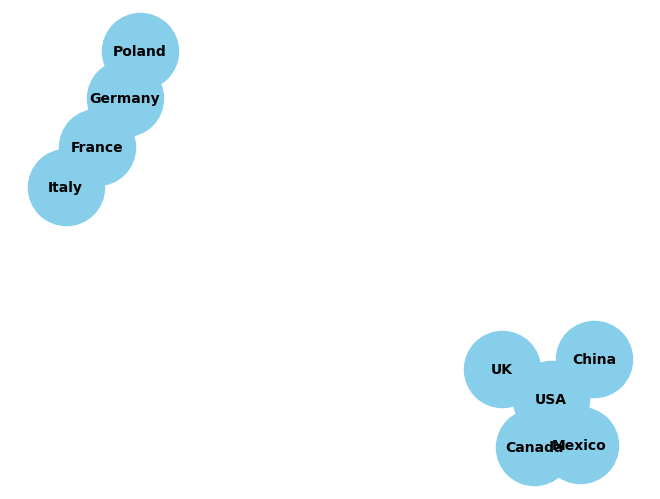

In [34]:
# Drawing the network graph using networkx's built-in functions
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold')

# Optionally, you can choose different layouts, for example:
# nx.spring_layout(G) - For a force-directed layout (default)
# nx.circular_layout(G) - For a circular layout

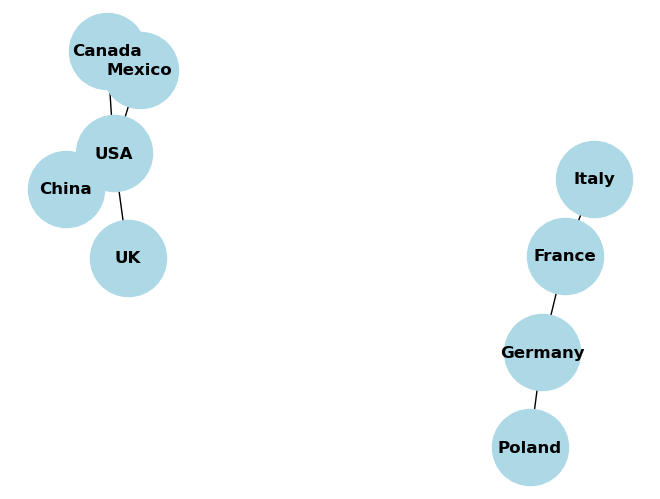

In [35]:
# Different layouts you can try:
pos = nx.spring_layout(G)    # Force-directed layout
# pos = nx.circular_layout(G) # Circular layout
# pos = nx.shell_layout(G)    # Shell layout
# pos = nx.kamada_kawai_layout(G) # Kamada-Kawai layout

# Draw the graph with the selected layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_weight='bold')

In [36]:
# Add edges to the graph for 'Ally' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Ally'], relationship='Ally')

# Add edges to the graph for 'Trade_Partner' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Trade_Partner'], relationship='Trade Partner')

# Step 4: Create a Pyvis network object
net = Network(notebook=True)

# Step 5: Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Step 6: Customize the network
# Adding nodes and edges with labels
for node in G.nodes(data=True):
    net.add_node(node[0], label=node[0])  # Add country names as labels

for edge in G.edges(data=True):
    relationship = edge[2]['relationship']
    net.add_edge(edge[0], edge[1], title=relationship)  # Use title for displaying relationship on hover

# Step 7: Customize the appearance
net.set_options("""
var options = {
  "height": "800px",
  "width": "100%",
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -8000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09,
      "avoidOverlap": 1
    }
  },
  "manipulation": {
    "enabled": false
  },
  "nodes": {
    "shape": "dot",
    "size": 20,
    "color": {
      "border": "rgba(0, 0, 0, 0.8)",
      "background": "rgba(135, 206, 235, 0.8)"
    },
    "font": {
      "color": "black",
      "size": 14,
      "face": "arial",
      "strokeWidth": 2
    }
  },
  "edges": {
    "smooth": {
      "enabled": true,
      "type": "continuous",
      "roundness": 0.5
    },
    "color": {
      "color": "rgba(0, 0, 0, 0.5)",
      "highlight": "rgba(255, 0, 0, 1)",
      "hover": "rgba(255, 0, 0, 1)"
    }
  }
}
""")

# Step 8: Save the network as an HTML file
net.save_graph("country_relationships_network.html")

print("Interactive network graph saved as 'country_relationships_network.html'")

Interactive network graph saved as 'country_relationships_network.html'


In [37]:
!pip install python-louvain leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=c8371681462cf2f8cb789236f99c0bbcebca315b6d8444659e1fd93e42d0ece0
  Stored in directory: /Users/renubalaji/Library/Caches/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


In [41]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import leidenalg as la
import igraph as ig

# Step 1: Define the country relationships (example structure)
country_relationships = {
    'Country': ['USA', 'Canada', 'Mexico', 'France', 'Germany'],
    'Ally': ['UK', 'USA', 'USA', 'Germany', 'France'],
    'Trade_Partner': ['China', 'Mexico', 'Canada', 'Italy', 'Poland']
}

# Step 2: Convert the data to a DataFrame
df = pd.DataFrame(country_relationships)

# Step 3: Create a NetworkX graph object
G = nx.Graph()

# Add edges to the graph for 'Ally' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Ally'], relationship='Ally')

# Add edges to the graph for 'Trade_Partner' relationships
for i, row in df.iterrows():
    G.add_edge(row['Country'], row['Trade_Partner'], relationship='Trade Partner')

# Step 4: Convert to igraph format for Leiden algorithm
igraph_G = ig.Graph.from_networkx(G)

# Set the vertex names explicitly
igraph_G.vs["name"] = list(G.nodes())

# Step 5: Apply the Leiden algorithm to find communities
partition = la.find_partition(igraph_G, la.RBConfigurationVertexPartition)

# Step 6: Add community information back to NetworkX graph
community_mapping = {}
for community_id, members in enumerate(partition):
    for member in members:
        community_mapping[igraph_G.vs[member]["name"]] = community_id  # Use name attribute for correct mapping

# Step 7: Create a Pyvis network object
net = Network(notebook=True)

# Step 8: Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Step 9: Customize the network based on communities
for node in G.nodes(data=True):
    community_id = community_mapping.get(node[0])  # Safely get community ID
    if community_id is not None:
        # Assign a color based on the community
        net.add_node(node[0], label=node[0], color=f'rgba({community_id*50 % 255}, {100 + community_id * 50 % 155}, {150 + community_id * 30 % 105}, 1)')
    else:
        # Fallback color if community ID is not found
        net.add_node(node[0], label=node[0], color='rgba(200, 200, 200, 1)')  # Grey for unassigned nodes

for edge in G.edges(data=True):
    relationship = edge[2]['relationship']
    net.add_edge(edge[0], edge[1], title=relationship)

# Step 10: Save the network as an HTML file
net.save_graph("country_relationships_network_with_communities.html")

print("Interactive network graph with communities saved as 'country_relationships_network_with_communities.html'")

Interactive network graph with communities saved as 'country_relationships_network_with_communities.html'


In the network visualization of country relationships, nodes represent countries, and edges depict the relationships between them. The communities are differentiated by the types of relationships (e.g., allies or trade partners). The partitioning in the graph appears to group countries based on geopolitical and economic ties, which mostly make sense according to historical alliances and trade dynamics.

For example:

The USA, UK, Canada, and Mexico are grouped, reflecting North American and transatlantic alliances like NATO, as well as trade agreements like NAFTA (now USMCA).
China’s connection as a trade partner with the USA also reflects modern economic realities, despite political tensions.
France, Germany, Italy, and Poland are grouped, highlighting their strong ties within the European Union, where they have significant political and economic interactions.
From these connections, one can conclude that the network reflects both historical military alliances and contemporary trade partnerships. However, some simplifications may be present, as the complexity of global relationships might not be fully captured (e.g., countries with multifaceted relationships across different regions).

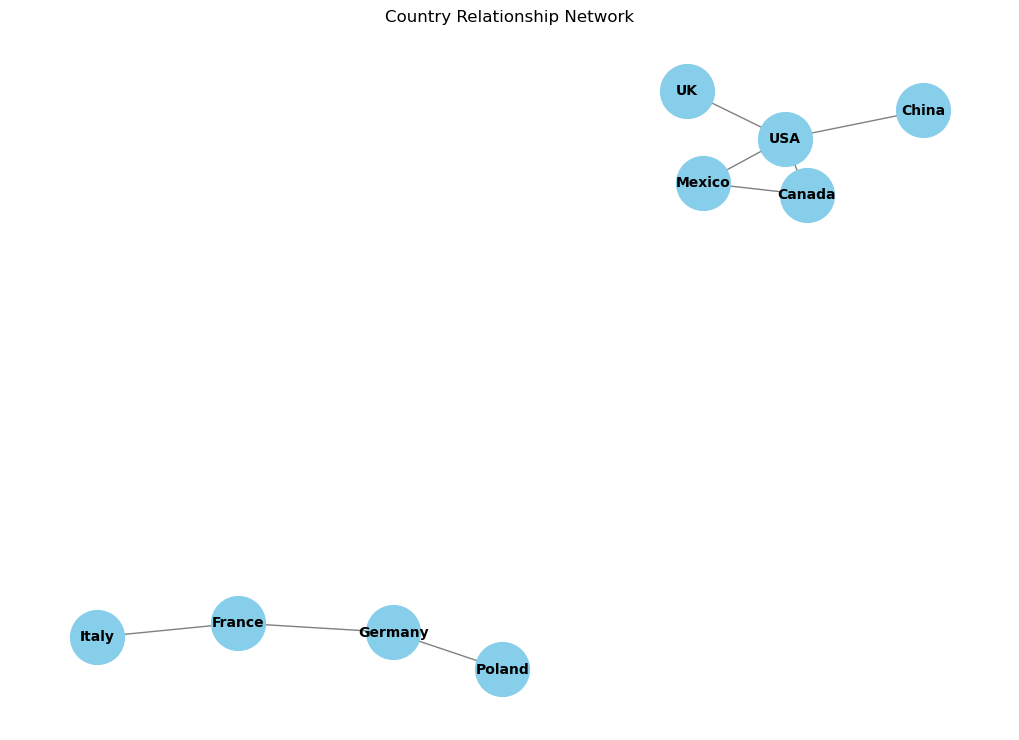

Degree Centrality: {'USA': 0.5, 'UK': 0.125, 'Canada': 0.25, 'Mexico': 0.25, 'France': 0.25, 'Germany': 0.25, 'China': 0.125, 'Italy': 0.125, 'Poland': 0.125}
Closeness Centrality: {'USA': 0.5, 'UK': 0.2857142857142857, 'Canada': 0.3333333333333333, 'Mexico': 0.3333333333333333, 'France': 0.28125, 'Germany': 0.28125, 'China': 0.2857142857142857, 'Italy': 0.1875, 'Poland': 0.1875}
Betweenness Centrality: {'USA': 0.17857142857142855, 'UK': 0.0, 'Canada': 0.0, 'Mexico': 0.0, 'France': 0.07142857142857142, 'Germany': 0.07142857142857142, 'China': 0.0, 'Italy': 0.0, 'Poland': 0.0}


In [42]:
# Adding nodes and edges from the data provided
edges = [
    ("USA", "UK", "Ally"),
    ("USA", "Canada", "Ally"),
    ("USA", "Mexico", "Ally"),
    ("USA", "China", "Trade Partner"),
    ("Canada", "Mexico", "Trade Partner"),
    ("France", "Germany", "Ally"),
    ("France", "Italy", "Trade Partner"),
    ("Germany", "Poland", "Trade Partner"),
]

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], relationship=edge[2])

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Plotting the graph
pos = nx.spring_layout(G)

# Draw the network
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', edge_color="gray")
plt.title('Country Relationship Network')
plt.show()

# Displaying centrality measures
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

Degree Centrality:

USA has the highest degree centrality (0.5), meaning it has direct connections with the largest number of countries in this network. This is reflective of its geopolitical and economic importance.
Countries like Canada, Mexico, France, and Germany have moderate degree centrality (0.25), showing that they are also well-connected but less so than the USA.
UK, China, Italy, and Poland have the lowest degree centrality (0.125), indicating fewer direct relationships in the network.
Closeness Centrality:

USA again ranks the highest in closeness centrality (0.5), suggesting it is "closer" to all other countries in terms of the shortest paths, making it influential in reaching any part of the network quickly.
Canada and Mexico (0.33) follow next, reflecting their proximity to the USA and their role in key relationships.
France and Germany (0.28125) are closely linked within their community, likely due to their strong European ties.
Italy and Poland have the lowest closeness centrality (0.1875), indicating they are relatively peripheral in this network.
Betweenness Centrality:

USA has the highest betweenness centrality (0.178), meaning it plays a significant role in connecting different parts of the network and is likely a bridge between multiple communities.
France and Germany (0.071) also play a bridging role, though to a lesser extent, connecting European countries.
All other countries, including UK, Canada, Mexico, China, Italy, and Poland, have a betweenness centrality of zero, indicating they are not key intermediaries in connecting other countries.